# Imports

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch import nn
from helpers import *
from models import *

# Preprocessing

In [2]:
dataset_dir = "./Teeth DataSet/Teeth_Dataset"

show_counts function is in file helpers/utils.py

In [3]:
train_class_weights, train_class_weights_norm, train_class_counts = show_counts(f"{dataset_dir}/Training")

Class 'CaS' contains 480 images.
Class 'CoS' contains 450 images.
Class 'Gum' contains 360 images.
Class 'MC' contains 540 images.
Class 'OC' contains 324 images.
Class 'OLP' contains 540 images.
Class 'OT' contains 393 images.


In [4]:
train_class_weights_norm

{'CaS': 0.12689335505026225,
 'CoS': 0.13535291205361308,
 'Gum': 0.16919114006701633,
 'MC': 0.11279409337801088,
 'OC': 0.18799015563001817,
 'OLP': 0.11279409337801088,
 'OT': 0.15498425044306838}

In [5]:
im_target_shape = (224, 224)
train_transform = transforms.Compose([
    transforms.Resize(im_target_shape),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),      # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(im_target_shape),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_dataset = ImageFolder(root=f'{dataset_dir}/Training', transform=train_transform)
val_dataset = ImageFolder(root=f'{dataset_dir}/Validation', transform=test_transform)
test_dataset = ImageFolder(root=f'{dataset_dir}/Testing', transform=test_transform)

batch_size = 16
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


In [6]:
test_dataset.classes

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

# Model

create_resnet function is in file models/resnet_finetuned.py

In [6]:
resnet18 = create_resnet(num_classes=len(train_dataset.classes), resnet_type="resnet18")

c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001, weight_decay=0.0001)
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
num_epochs = 10

train function is in file helpers/train.py

In [9]:
train(
    model=resnet18,
    optimizer=optimizer, 
    criterion=criterion, 
    train_loader=train_loader, 
    val_loader=val_loader, 
    num_epochs=num_epochs, 
    device=device,
    models_weights_path="./models_weights/resnet18/best_model.pth")


Epoch 1/10
----------


100%|██████████| 193/193 [00:12<00:00, 15.99it/s]


Train Loss: 1.5031, Accuracy: 43.12%, Precision: 0.4284, Recall: 0.4312, F1 Score: 0.4276


100%|██████████| 65/65 [00:08<00:00,  7.64it/s]


Val Loss: 1.7109, Accuracy: 47.86%, Precision: 0.5907, Recall: 0.4786, F1 Score: 0.4613
--------------------------------------------------
Best model saved with Val Loss: 1.7109
Epoch 2/10
----------


100%|██████████| 193/193 [00:11<00:00, 17.15it/s]


Train Loss: 1.0791, Accuracy: 60.61%, Precision: 0.6042, Recall: 0.6061, F1 Score: 0.6030


100%|██████████| 65/65 [00:07<00:00,  8.95it/s]


Val Loss: 1.0595, Accuracy: 62.65%, Precision: 0.6906, Recall: 0.6265, F1 Score: 0.6083
--------------------------------------------------
Best model saved with Val Loss: 1.0595
Epoch 3/10
----------


100%|██████████| 193/193 [00:11<00:00, 17.41it/s]


Train Loss: 0.9113, Accuracy: 66.80%, Precision: 0.6674, Recall: 0.6680, F1 Score: 0.6664


100%|██████████| 65/65 [00:07<00:00,  9.20it/s]


Val Loss: 0.9874, Accuracy: 64.20%, Precision: 0.7186, Recall: 0.6420, F1 Score: 0.6259
--------------------------------------------------
Best model saved with Val Loss: 0.9874
Epoch 4/10
----------


100%|██████████| 193/193 [00:10<00:00, 17.69it/s]


Train Loss: 0.7462, Accuracy: 73.44%, Precision: 0.7339, Recall: 0.7344, F1 Score: 0.7329


100%|██████████| 65/65 [00:08<00:00,  7.36it/s]


Val Loss: 0.6670, Accuracy: 72.67%, Precision: 0.7605, Recall: 0.7267, F1 Score: 0.7184
--------------------------------------------------
Best model saved with Val Loss: 0.6670
Epoch 5/10
----------


100%|██████████| 193/193 [00:10<00:00, 17.77it/s]


Train Loss: 0.6678, Accuracy: 76.35%, Precision: 0.7626, Recall: 0.7635, F1 Score: 0.7617


100%|██████████| 65/65 [00:07<00:00,  9.21it/s]


Val Loss: 0.4775, Accuracy: 82.20%, Precision: 0.8409, Recall: 0.8220, F1 Score: 0.8210
--------------------------------------------------
Best model saved with Val Loss: 0.4775
Epoch 6/10
----------


100%|██████████| 193/193 [00:10<00:00, 17.99it/s]


Train Loss: 0.5097, Accuracy: 81.79%, Precision: 0.8176, Recall: 0.8179, F1 Score: 0.8172


100%|██████████| 65/65 [00:07<00:00,  9.03it/s]


Val Loss: 0.5341, Accuracy: 81.61%, Precision: 0.8252, Recall: 0.8161, F1 Score: 0.8165
--------------------------------------------------
Epoch 7/10
----------


100%|██████████| 193/193 [00:10<00:00, 17.97it/s]


Train Loss: 0.4048, Accuracy: 85.94%, Precision: 0.8593, Recall: 0.8594, F1 Score: 0.8590


100%|██████████| 65/65 [00:07<00:00,  8.94it/s]


Val Loss: 0.4284, Accuracy: 84.44%, Precision: 0.8594, Recall: 0.8444, F1 Score: 0.8409
--------------------------------------------------
Best model saved with Val Loss: 0.4284
Epoch 8/10
----------


100%|██████████| 193/193 [00:10<00:00, 18.09it/s]


Train Loss: 0.4029, Accuracy: 85.81%, Precision: 0.8581, Recall: 0.8581, F1 Score: 0.8578


100%|██████████| 65/65 [00:07<00:00,  9.24it/s]


Val Loss: 0.3067, Accuracy: 89.88%, Precision: 0.9032, Recall: 0.8988, F1 Score: 0.8981
--------------------------------------------------
Best model saved with Val Loss: 0.3067
Epoch 9/10
----------


100%|██████████| 193/193 [00:10<00:00, 18.00it/s]


Train Loss: 0.3440, Accuracy: 87.66%, Precision: 0.8772, Recall: 0.8766, F1 Score: 0.8764


100%|██████████| 65/65 [00:07<00:00,  9.26it/s]


Val Loss: 0.2936, Accuracy: 89.88%, Precision: 0.9019, Recall: 0.8988, F1 Score: 0.8988
--------------------------------------------------
Best model saved with Val Loss: 0.2936
Epoch 10/10
----------


100%|██████████| 193/193 [00:10<00:00, 18.03it/s]


Train Loss: 0.3063, Accuracy: 89.37%, Precision: 0.8937, Recall: 0.8937, F1 Score: 0.8935


100%|██████████| 65/65 [00:07<00:00,  9.23it/s]

Val Loss: 0.3377, Accuracy: 87.06%, Precision: 0.8865, Recall: 0.8706, F1 Score: 0.8701
--------------------------------------------------


evaluate function is in file helpers/evaluate.py

In [11]:
evaluate(dataloader=test_loader, model=resnet18, device=device, criterion=criterion)

100%|██████████| 65/65 [00:07<00:00,  8.97it/s]


(0.35067928700636214,
 87.64591439688716,
 0.891959017350064,
 0.8764591439688716,
 0.8762765484632277)

## Continue training for 10 more epochs (from 10 to 20)

In [13]:
train(
    model=resnet18,
    optimizer=optimizer, 
    criterion=criterion, 
    train_loader=train_loader, 
    val_loader=val_loader, 
    num_epochs=20,
    start_epoch=10, 
    device=device,
    models_weights_path="./models_weights/resnet18/best_model.pth")


Epoch 11/20
----------


100%|██████████| 193/193 [00:10<00:00, 18.43it/s]


Train Loss: 0.2612, Accuracy: 90.18%, Precision: 0.9020, Recall: 0.9018, F1 Score: 0.9016


100%|██████████| 65/65 [00:05<00:00, 11.66it/s]


Val Loss: 0.3334, Accuracy: 89.01%, Precision: 0.8969, Recall: 0.8901, F1 Score: 0.8893
--------------------------------------------------
Best model saved with Val Loss: 0.3334
Epoch 12/20
----------


100%|██████████| 193/193 [00:10<00:00, 17.71it/s]


Train Loss: 0.2086, Accuracy: 92.68%, Precision: 0.9270, Recall: 0.9268, F1 Score: 0.9266


100%|██████████| 65/65 [00:07<00:00,  8.49it/s]


Val Loss: 0.1580, Accuracy: 94.94%, Precision: 0.9512, Recall: 0.9494, F1 Score: 0.9494
--------------------------------------------------
Best model saved with Val Loss: 0.1580
Epoch 13/20
----------


100%|██████████| 193/193 [00:11<00:00, 17.40it/s]


Train Loss: 0.2577, Accuracy: 91.19%, Precision: 0.9119, Recall: 0.9119, F1 Score: 0.9117


100%|██████████| 65/65 [00:07<00:00,  8.24it/s]


Val Loss: 0.3605, Accuracy: 86.67%, Precision: 0.8822, Recall: 0.8667, F1 Score: 0.8660
--------------------------------------------------
Epoch 14/20
----------


100%|██████████| 193/193 [00:10<00:00, 17.57it/s]


Train Loss: 0.2045, Accuracy: 93.00%, Precision: 0.9300, Recall: 0.9300, F1 Score: 0.9299


100%|██████████| 65/65 [00:06<00:00,  9.31it/s]


Val Loss: 0.3214, Accuracy: 88.62%, Precision: 0.8899, Recall: 0.8862, F1 Score: 0.8851
--------------------------------------------------
Epoch 15/20
----------


100%|██████████| 193/193 [00:10<00:00, 17.60it/s]


Train Loss: 0.2379, Accuracy: 91.84%, Precision: 0.9183, Recall: 0.9184, F1 Score: 0.9183


100%|██████████| 65/65 [00:07<00:00,  8.98it/s]


Val Loss: 0.1880, Accuracy: 93.77%, Precision: 0.9413, Recall: 0.9377, F1 Score: 0.9377
--------------------------------------------------
Epoch 16/20
----------


100%|██████████| 193/193 [00:10<00:00, 17.61it/s]


Train Loss: 0.1915, Accuracy: 93.26%, Precision: 0.9327, Recall: 0.9326, F1 Score: 0.9326


100%|██████████| 65/65 [00:07<00:00,  8.96it/s]


Val Loss: 0.2246, Accuracy: 91.93%, Precision: 0.9215, Recall: 0.9193, F1 Score: 0.9184
--------------------------------------------------
Epoch 17/20
----------


100%|██████████| 193/193 [00:11<00:00, 17.22it/s]


Train Loss: 0.2333, Accuracy: 92.03%, Precision: 0.9204, Recall: 0.9203, F1 Score: 0.9202


100%|██████████| 65/65 [00:07<00:00,  9.11it/s]


Val Loss: 0.4461, Accuracy: 86.19%, Precision: 0.8776, Recall: 0.8619, F1 Score: 0.8573
--------------------------------------------------
Epoch 18/20
----------


100%|██████████| 193/193 [00:10<00:00, 17.89it/s]


Train Loss: 0.1666, Accuracy: 94.40%, Precision: 0.9440, Recall: 0.9440, F1 Score: 0.9439


100%|██████████| 65/65 [00:07<00:00,  8.36it/s]


Val Loss: 0.1163, Accuracy: 96.01%, Precision: 0.9615, Recall: 0.9601, F1 Score: 0.9602
--------------------------------------------------
Best model saved with Val Loss: 0.1163
Epoch 19/20
----------


100%|██████████| 193/193 [00:11<00:00, 16.87it/s]


Train Loss: 0.1853, Accuracy: 94.14%, Precision: 0.9414, Recall: 0.9414, F1 Score: 0.9413


100%|██████████| 65/65 [00:07<00:00,  8.25it/s]


Val Loss: 0.1666, Accuracy: 94.16%, Precision: 0.9433, Recall: 0.9416, F1 Score: 0.9418
--------------------------------------------------
Epoch 20/20
----------


100%|██████████| 193/193 [00:11<00:00, 17.52it/s]


Train Loss: 0.1507, Accuracy: 94.59%, Precision: 0.9461, Recall: 0.9459, F1 Score: 0.9458


100%|██████████| 65/65 [00:07<00:00,  8.15it/s]

Val Loss: 0.1400, Accuracy: 95.04%, Precision: 0.9533, Recall: 0.9504, F1 Score: 0.9506
--------------------------------------------------


after 20 epochs

In [18]:
torch.save(resnet18, "./models_weights/resnet18/final_model.pth")

## Evaluating

In [7]:
final_model = torch.load("./models_weights/resnet18/final_model.pth")

C:\Users\001\AppData\Local\Temp\ipykernel_11740\3961852638.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  final_model = torch.load("./models_weights/resnet18/final_mode

100%|██████████| 65/65 [00:07<00:00,  8.78it/s]


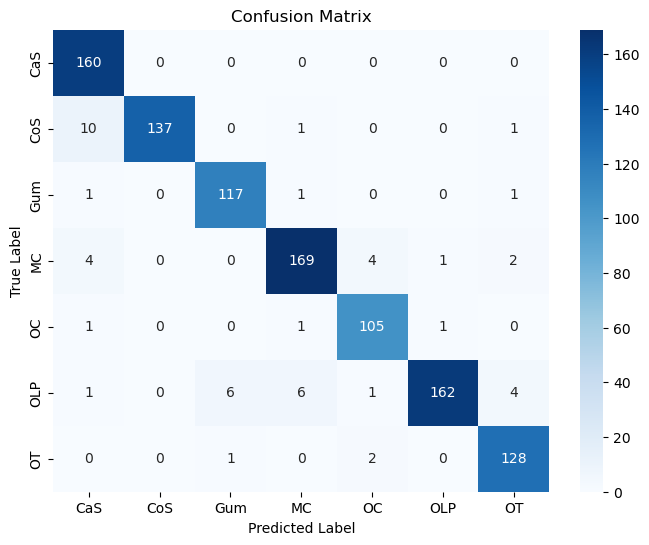

Average Loss: 0.1708
Accuracy: 95.1362
Precision: 0.9534
Recall: 0.9514
F1 Score: 0.9513


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss()
final_avg_loss, final_test_acc, final_test_prec, final_test_recall, final_test_f1 = evaluate(dataloader=test_loader, model=final_model, device=device, criterion=criterion, is_testing=True, class_names=test_dataset.classes)


In [33]:
# final_avg_loss, final_test_acc, final_test_prec, final_test_recall, final_test_f1

(0.17033182693322976,
 95.13618677042801,
 0.9534109405773624,
 0.9513618677042801,
 0.9512956473627326)

In [13]:
best_model = torch.load("./models_weights/resnet18/best_model.pth")

C:\Users\001\AppData\Local\Temp\ipykernel_11740\3496385722.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load("./models_weights/resnet18/best_model.

best model

100%|██████████| 65/65 [00:07<00:00,  9.12it/s]


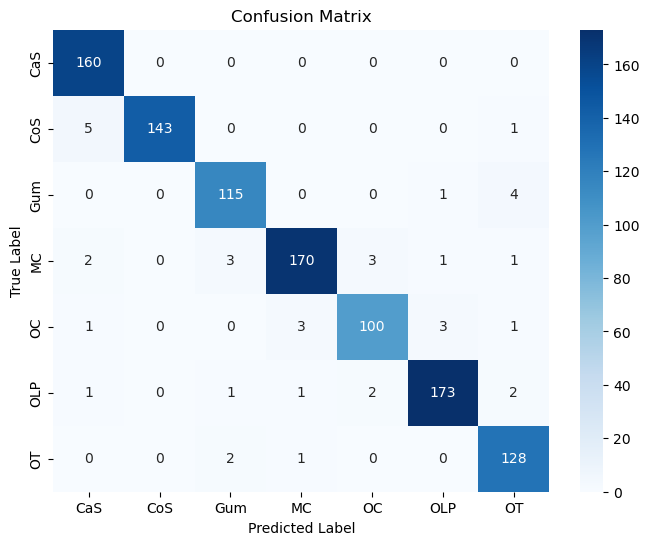

Average Loss: 0.1152
Accuracy: 96.2062
Precision: 0.9626
Recall: 0.9621
F1 Score: 0.9621


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
best_avg_loss, best_test_acc, best_test_prec, best_test_recall, best_test_f1 = evaluate(dataloader=test_loader, model=best_model, device=device, criterion=criterion, is_testing=True, class_names=test_dataset.classes)


# Streamlit

To view the simple streamlit app, click here: https://teeth-classification.streamlit.app/